* Author: Harshit Shambharkar
* Roll No. - ME21BTECH11019

# Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defining Parameters
L = 0.5/2 # Given is 2L = 50 cm
q_dot = 50000
T_ambient = 25
h_conv = 22
k = 0.5
Tolerance = 1e-3

n = 21

x = np.linspace(-L, L, n, endpoint=True)
h = x[1] - x[0] # Grid size

593.1818181818181


Text(0.5, 0, 'Distance(x) along the Rod')

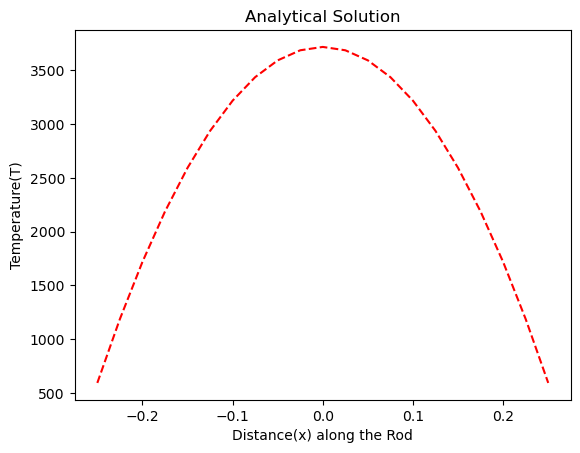

In [3]:
#Analytical Solution
T_surf = T_ambient + q_dot*L/h_conv #using Boundary Condition calculated T at surface
print(T_surf)
T_analytical = 0.5*q_dot*(L**2)*(1 - x**2/L**2)/k + T_surf

plt.plot(x, T_analytical, 'r--')
plt.title("Analytical Solution")
plt.ylabel("Temperature(T)")
plt.xlabel("Distance(x) along the Rod")

                                                Jacobi Method

No. of Iterations in Jacobi Method:  887


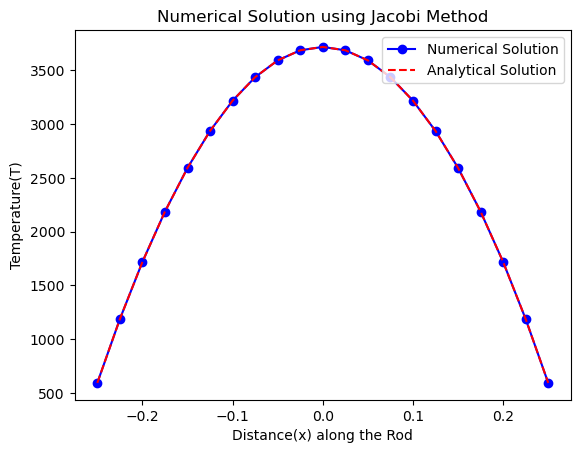

In [4]:
T_j = np.zeros(n)

C = (q_dot)*(h**2)/k
 
T_j[0] = T_surf
T_j[n-1] = T_surf

T_old_j = np.copy(T_j)
iterations = 0
Error = 1

while Error > Tolerance:
    
    for i in range(1,n-1):
        T_j[i] = 0.5*(C + T_old_j[i-1] + T_old_j[i+1])
        
    Error = max(abs(T_j - T_old_j))
    T_old_j = np.copy(T_j)
    iterations = iterations + 1
    
plt.plot(x, T_j, 'b-o')
plt.plot(x, T_analytical, 'r--')
plt.title("Numerical Solution using Jacobi Method")
plt.ylabel("Temperature(T)")
plt.xlabel("Distance(x) along the Rod")
plt.legend(["Numerical Solution", "Analytical Solution"], loc='upper right')

print("No. of Iterations in Jacobi Method: ", iterations)

                                        Gauss Siedel Method

No. of Iterations in Gauss Siedel Method:  465


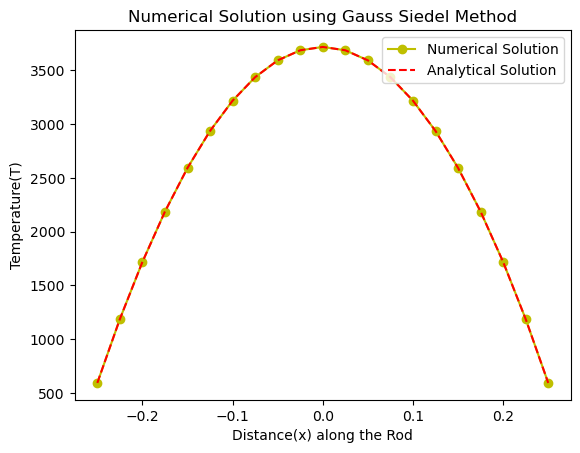

In [5]:
T_gs = np.zeros(n)
B = (q_dot/k)*np.ones(n)

T_gs[0] = T_surf
T_gs[n-1] = T_surf

T_old_gs = np.copy(T_gs)
iterations = 0
Error = 1

while Error > Tolerance:
    
    for i in range(1,n-1):
        T_gs[i] = 0.5*(C + T_gs[i-1] + T_old_gs[i+1])
        
    Error = max(abs(T_gs - T_old_gs))
    T_old_gs = np.copy(T_gs)
    iterations = iterations + 1
    
    
plt.plot(x, T_gs, 'y-o')
plt.plot(x, T_analytical, 'r--')
plt.title("Numerical Solution using Gauss Siedel Method")
plt.ylabel("Temperature(T)")
plt.xlabel("Distance(x) along the Rod")
plt.legend(["Numerical Solution", "Analytical Solution"], loc='upper right')

print("No. of Iterations in Gauss Siedel Method: ", iterations)

                         Tridiagonal Matrix Algorithm (TDMA), Thomas Algorithm

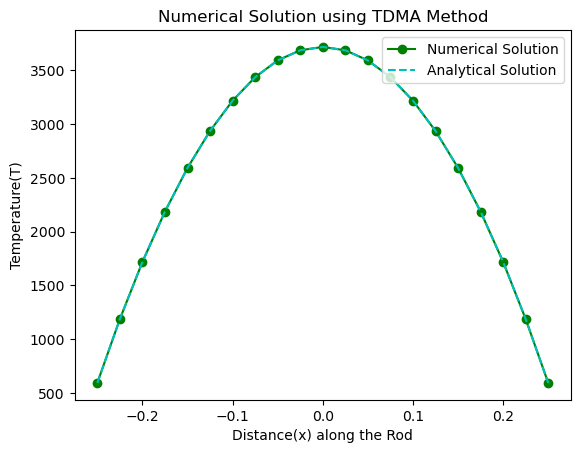

In [6]:
T_tdma = np.zeros(n)
T_tdma[0] = T_surf
T_tdma[n-1] = T_surf

P = np.zeros(n)
Q = np.zeros(n)

a, b, c, d = 2/h**2, 1/h**2, 1/h**2, q_dot/k

P[0] = 0
Q[0] = T_surf

for i in range(1,n):
    P[i] = b / (a - c*P[i-1])
    Q[i] = (d + c*Q[i-1]) / (a - c*P[i-1])
    
Q[n-1] = T_tdma[n-1]
    
for i in range(n-2,-1, -1):
    T_tdma[i] = T_tdma[i+1]*P[i] + Q[i]


plt.plot(x, T_tdma, 'g-o')
plt.plot(x, T_analytical, 'c--')
plt.title("Numerical Solution using TDMA Method")
plt.ylabel("Temperature(T)")
plt.xlabel("Distance(x) along the Rod")
plt.legend(["Numerical Solution", "Analytical Solution"], loc='upper right')

                                         Grid Independence test

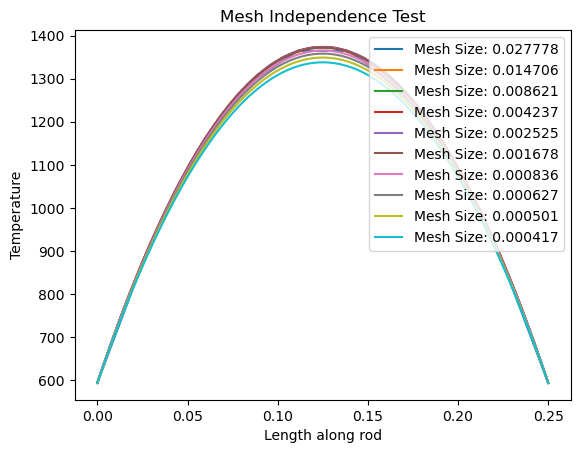

In [7]:
# plotting results using different grid points
grid_points = [10, 18, 30 , 60 ,100, 150, 300, 400, 500, 600]
plt.figure()

for m in grid_points:
    x_test = np.linspace(0,L,m)
    h = x_test[1] - x_test[0]
    T = np.zeros(m)
    C = (q_dot)*(h**2)/k

    T[0] = T_surf
    T[m-1] = T_surf
   
    T_old = np.copy(T)
    iterations = 0
    Error = 1
    while Error > Tolerance:

        for i in range(1,m-1):
            T[i] = 0.5*(C + T[i-1] + T_old[i+1])

        Error = max(abs(T - T_old))
        T_old = np.copy(T)
        iterations = iterations + 1
    
    plt.plot(x_test, T, label = f"Mesh Size: {h:.6f}")
    plt.title("Mesh Independence Test")
    plt.ylabel("Temperature")
    plt.xlabel("Length along rod")
    #plt.legend("ramankumar", loc='upper right')
    plt.legend(loc='upper right')
